# Module 5: Data Science with Python

## Task 4: Complete a Data Science Capstone Project

### Yoselin Delgado

## What will influence more in rating actorsor directors? Which actor/director?

# Cleaning and Pre-processing

### Python and all libraries needed to solve the problem

In [1]:
# Load the Pandas libraries - alias 'pd' 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
from datetime import date
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

%matplotlib inline

In [2]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier as GP
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)  # Unlimited columns.
pd.options.mode.use_inf_as_na = True        # Any inf or -inf is 
                                            # treated as NA.

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
# Uploading the dataset with Pandas
netflix_df = pd.read_csv('netflix_dataset.csv', header=0, low_memory=False)

In [6]:
netflix_df.rating.unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [7]:
netflix_df.rating.unique()

array([2, 3, 5, 4, 1], dtype=int64)

### Exploratory Data Analysis & Data Visualization

In [8]:
## add new features in the dataset
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [9]:
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [10]:
d1 = netflix_df[netflix_df["type"] == "TV Show"]
d2 = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#f678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49a"))
data = [trace1, trace2]
layout = go.Layout(title="Distribution of content by Year", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

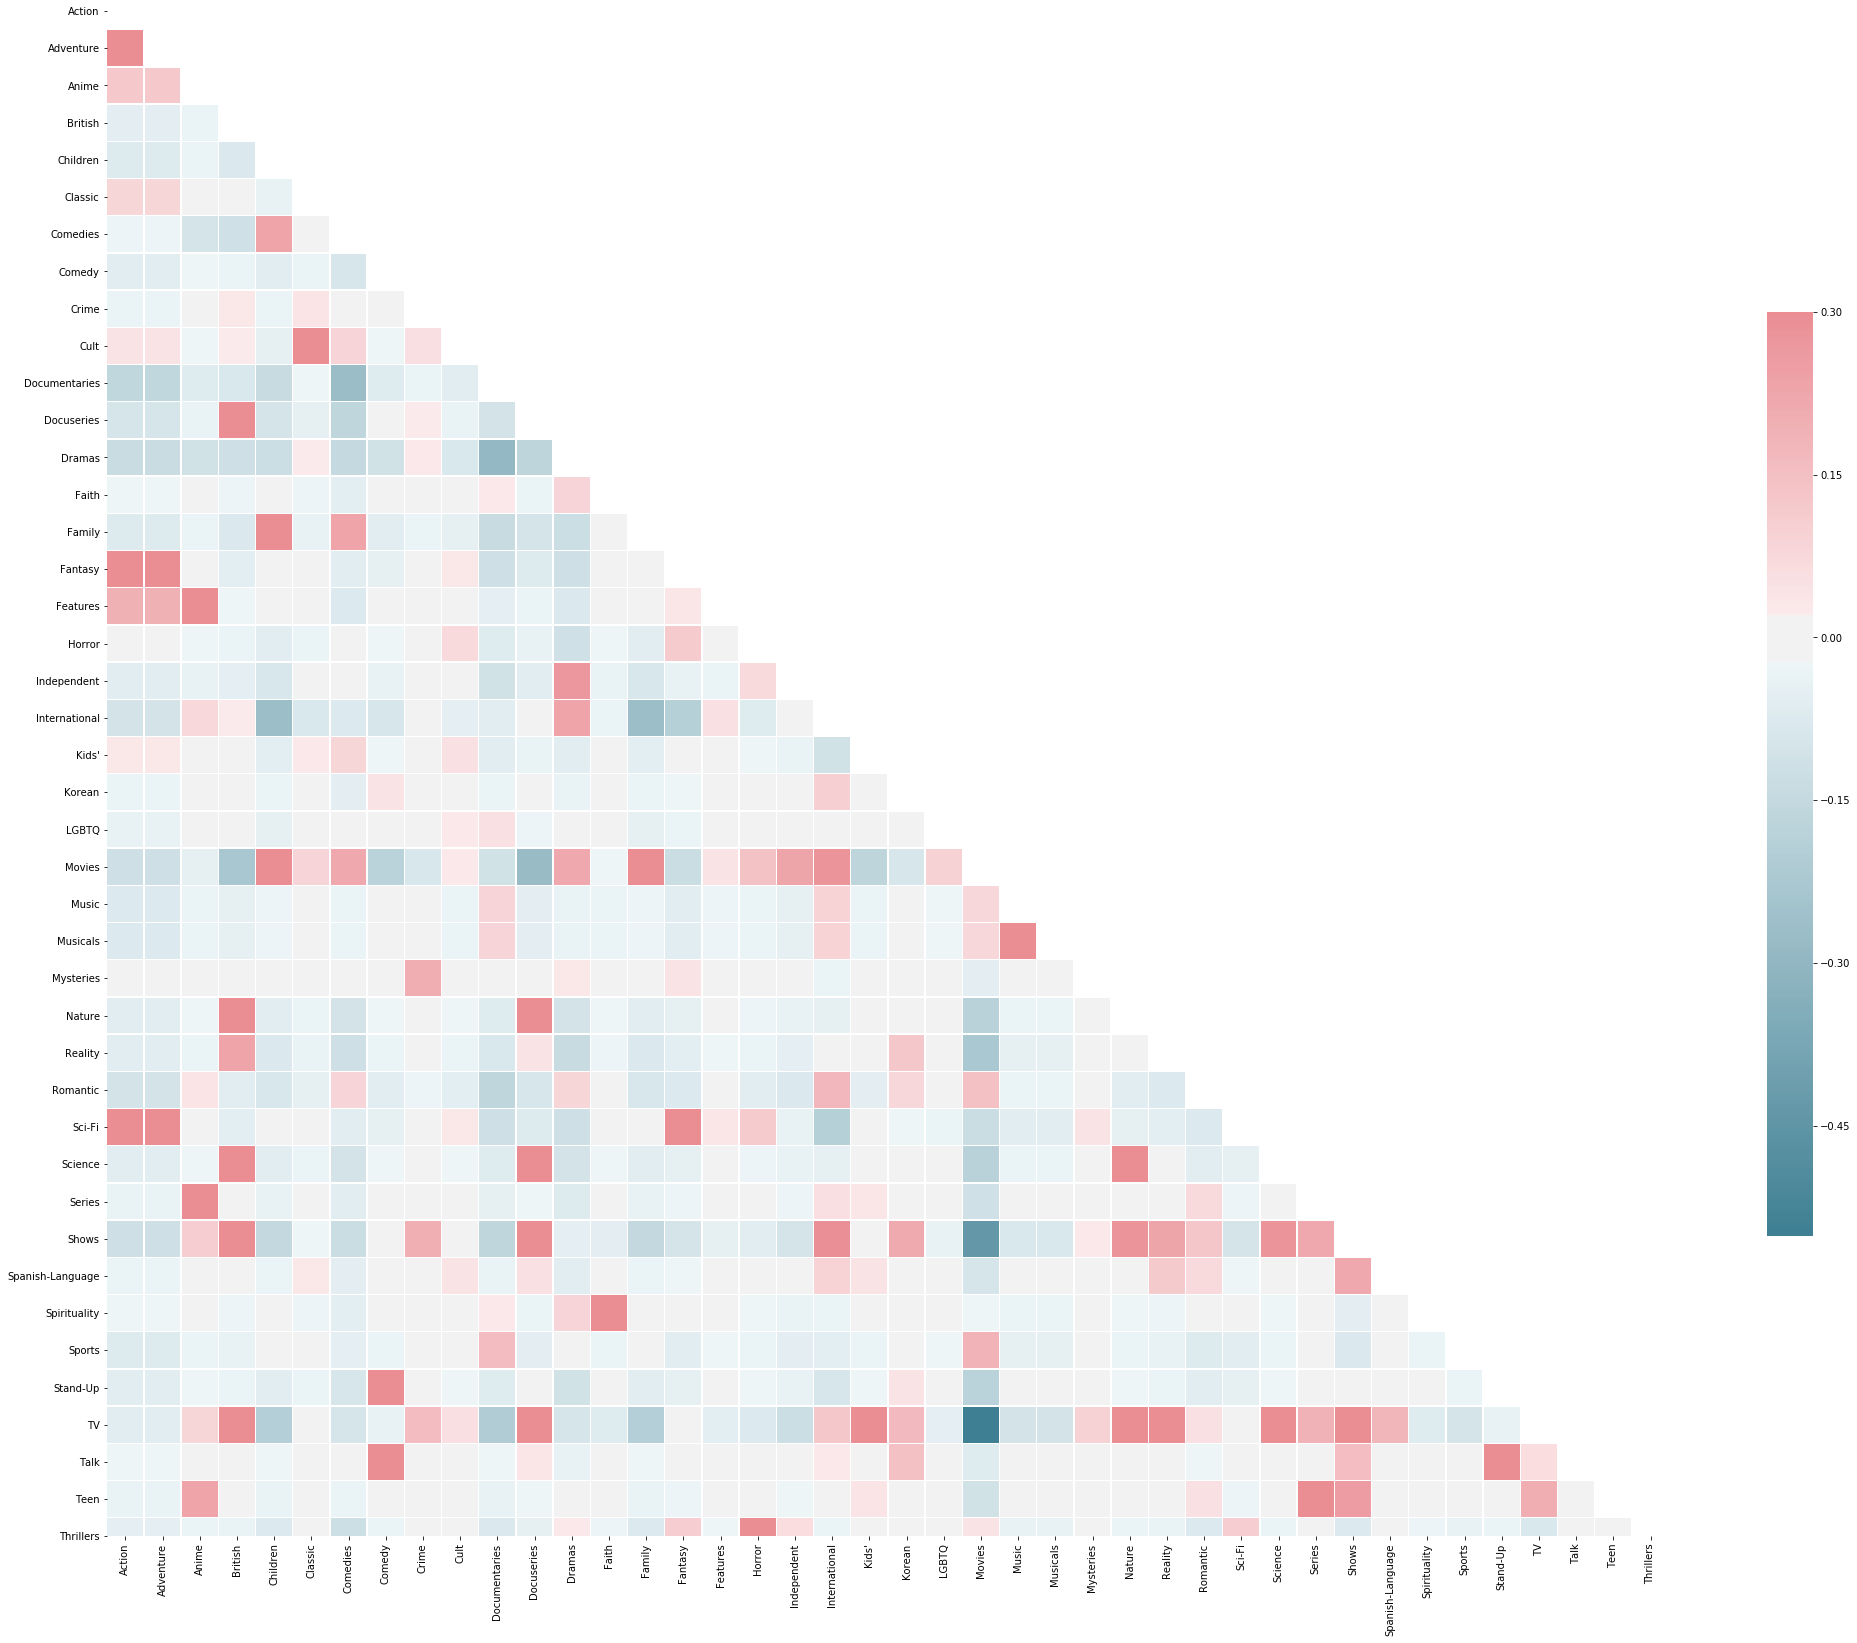

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

data=netflix_df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 

test = data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

C:\Users\yoselind\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\yoselind\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\yoselind\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



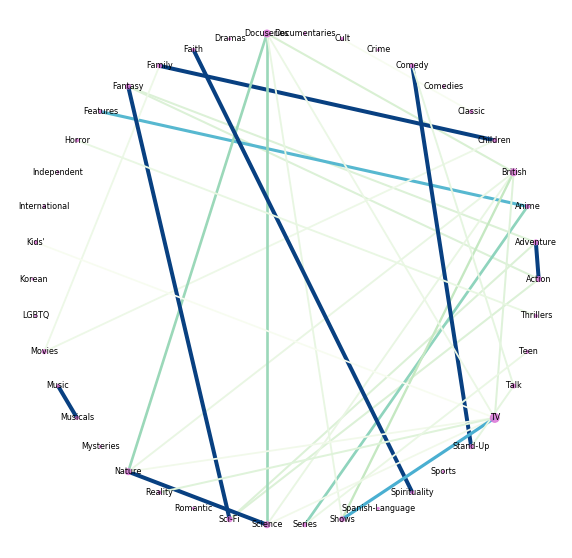

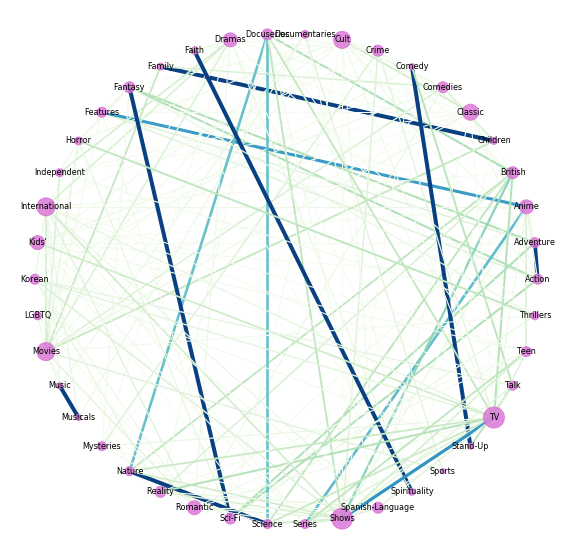

In [12]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

In [13]:
from collections import Counter

col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#d578da"))

data = [trace1]
layout = go.Layout(title="Distribution by Categories", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
small = netflix_df[netflix_df["type"] == "Movie"]
small = small[small["country"] == "United States"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="green"))

data = [trace1]
layout = go.Layout(title="Movie Directors from US with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [15]:
#Filter by Director
tag = "jan" #director name with more than 1 content listed
netflix_df["relevant"] = netflix_df['director'].fillna("").apply(lambda x : 1 if tag in x.lower() else 0)
small = netflix_df[netflix_df["relevant"] == 1]
small[['title', 'release_year', 'listed_in']]

title  release_year  \
59            The Lake House          2006   
229   Much Ado About Nothing          2016   
663     Esperando La Carroza          1985   
764             Semana Santa          2015   
977         Revolting Rhymes          2017   
1137         Mi amigo Alexis          2019   

                                             listed_in  
59           Dramas, Romantic Movies, Sci-Fi & Fantasy  
229   Dramas, Independent Movies, International Movies  
663        Comedies, Cult Movies, International Movies  
764                       Dramas, International Movies  
977                         British TV Shows, Kids' TV  
1137        Children & Family Movies, Comedies, Dramas

In [16]:
from collections import Counter
country_data = netflix_df['country']
country_data.head()

0    United States, India, South Korea, China
1                             France, Belgium
2                               United States
3                               United States
4                China, Canada, United States
Name: country, dtype: object

In [17]:
netflix_df.describe()

show_id  release_year       rating   year_added  month_added  \
count  1.391000e+03   1391.000000  1391.000000  1388.000000  1388.000000   
mean   7.346097e+07   2010.353702     3.036664  2017.814121     6.863833   
std    1.448081e+07     11.303274     1.210009     1.517037     3.719748   
min    2.815500e+05   1925.000000     1.000000  2008.000000     1.000000   
25%    7.015660e+07   2008.000000     2.000000  2017.000000     3.000000   
50%    8.009436e+07   2015.000000     2.000000  2018.000000     7.000000   
75%    8.020170e+07   2017.000000     4.000000  2019.000000    10.000000   
max    8.123560e+07   2019.000000     5.000000  2020.000000    12.000000   

          relevant  
count  1391.000000  
mean      0.004313  
std       0.065559  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [18]:
## add new features in the dataset
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


### Popular words for Movies

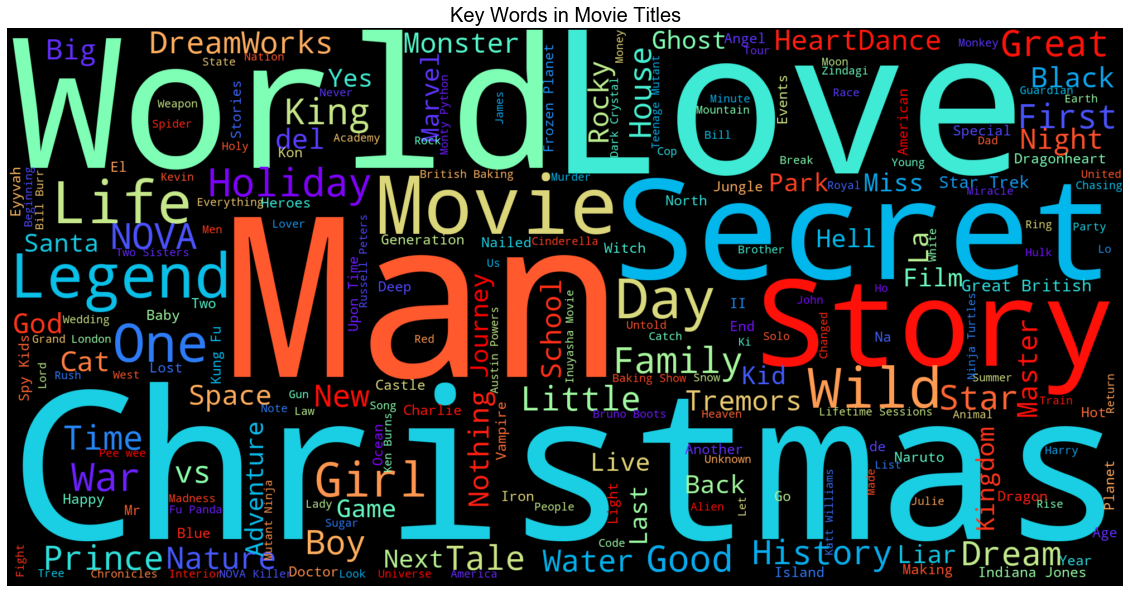

In [19]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
plt.style.use('seaborn')
wrds1 = netflix_df["title"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles",color='black',fontsize=20)
plt.show()

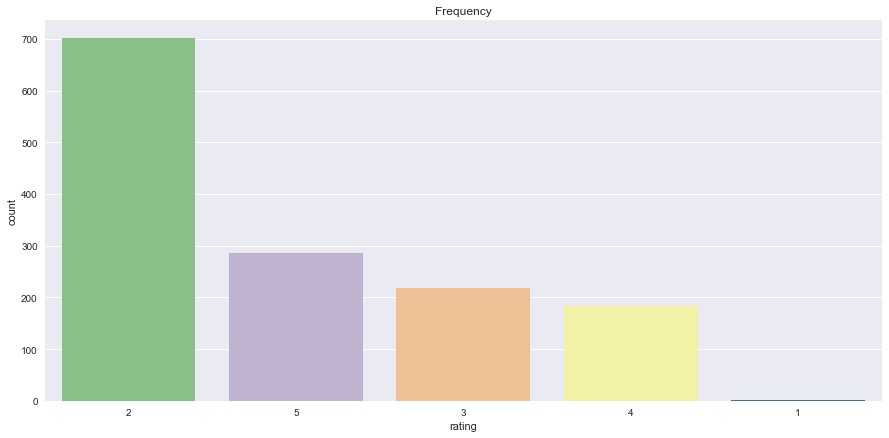

In [20]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "rating", order=netflix_df['rating'].value_counts().index[0:15] ,data=netflix_df,palette='Accent')

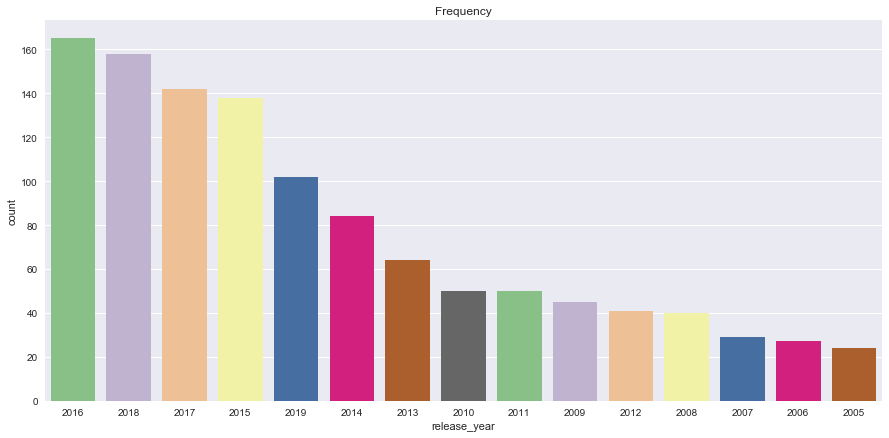

In [21]:

plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "release_year", order=netflix_df['release_year'].value_counts().index[0:15] ,data=netflix_df,palette='Accent')

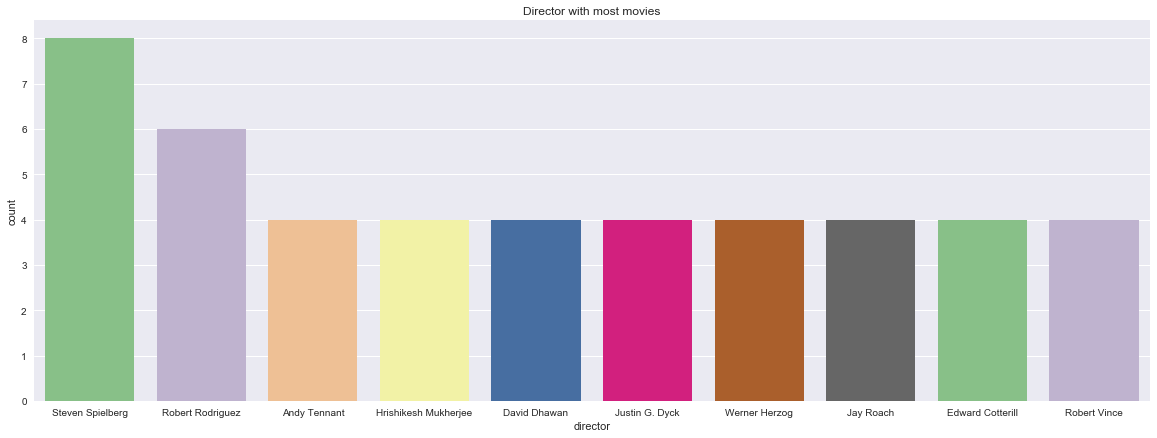

In [22]:
plt.figure(1, figsize=(20, 7))
plt.title("Director with most movies")
sns.countplot(x = "director", order=netflix_df['director'].value_counts().index[0:10] ,data=netflix_df,palette='Accent')

In [23]:
netflix_df =  netflix_df[netflix_df['duration'].notna()]
netflix_df = netflix_df[netflix_df.duration != 0]

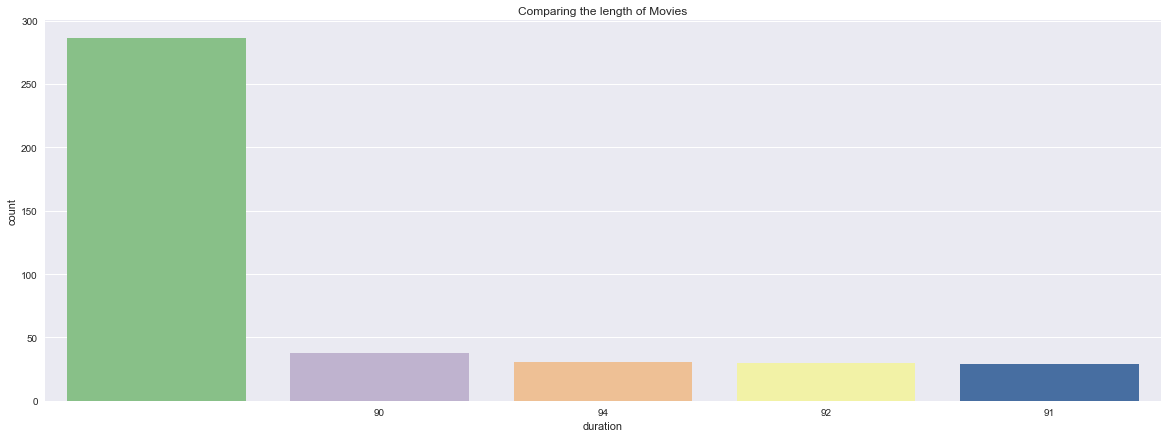

In [24]:
plt.figure(1, figsize=(20, 7))
plt.title("Comparing the length of Movies")
sns.countplot(x = "duration", order=netflix_df['duration'].value_counts().index[0:5] ,data=netflix_df,palette='Accent')

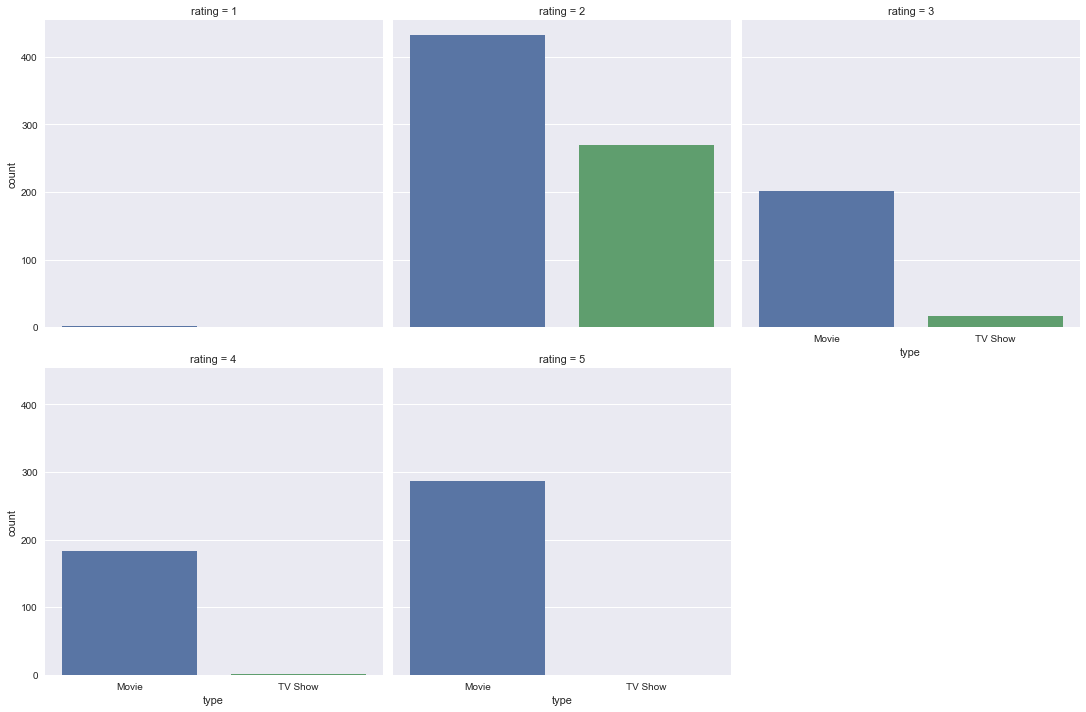

In [63]:
sns.catplot(x="type", col="rating", kind="count", col_wrap=3, data=netflix_df)

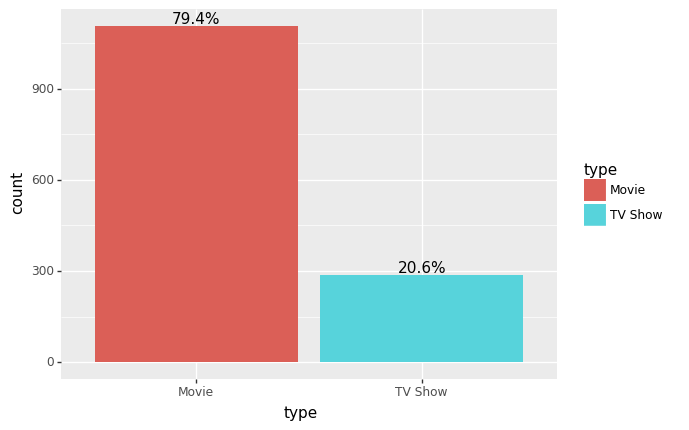

<ggplot: (-9223371878488686020)>

In [64]:
(ggplot(netflix_df, aes('type', fill='type'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

In [65]:
actors = netflix_df

In [66]:
actors= actors.drop('title', axis=1)

In [ ]:
actors= actors.drop('rating', axis=1)##dependent variable

### Removing rows with empty cast values

In [81]:
actors = netflix_df[netflix_df['cast'].notna()]

In [82]:
actors = actors[actors['director'].notna()]
actors = actors[actors['title'].notna()]
actors = actors[actors['rating'].notna()]
actors = actors[actors['type'].notna()]
actors = actors[actors['description'].notna()]

##### Splitting lists into rows 

In [110]:
netflix_w_names = pd.DataFrame(actors.cast.str.split(',').tolist(), index=[actors.rating, actors.director, actors.title, actors.type, actors.description]).stack()

In [111]:
netflix_w_names.head(1)

rating  director                  title                                    type   description                                                                                                                                    
2       Richard Finn, Tim Maltby  Norm of the North: King Sized Adventure  Movie  Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.  0    Alan Marriott
dtype: object

In [112]:
netflix_w_names = netflix_w_names.reset_index([0, 'rating', 'director','title','type','description'])
netflix_w_names.columns = ['rating','director','title','type','description', 'actor_name']
netflix_w_names.head(1)

rating                  director                                    title  \
0       2  Richard Finn, Tim Maltby  Norm of the North: King Sized Adventure   

    type                                        description     actor_name  
0  Movie  Before planning an awesome wedding for his gra...  Alan Marriott

In [113]:
netflix_w_names.rating.unique()

array([2, 3, 5, 4, 1], dtype=int64)

## Covariance Estimation

In [114]:
##Correlation Matrix
covMat = netflix_w_names.cov()
print(covMat)

          rating
rating  1.530563


###### Model Initialization

In [115]:
#Models
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelSVC = SVC()
modelGNB = GP()
modelDT = DecisionTreeClassifier()

In [116]:
#Reduced Feature Elimination (RFE) Variables
modelRF_RFE = RandomForestClassifier()
modelKNC_RFE = KNeighborsClassifier()
modelSVC_RFE = SVC()
modelGNB_RFE = GP()
modelDT_RFE = DecisionTreeClassifier()

In [117]:
#Principal Component Analysis  (PCA) Variables

modelRF_PCA = RandomForestClassifier()
modelKNC_PCA = KNeighborsClassifier()
modelSVC_PCA = SVC()
modelGNB_PCA = GP()
modelDT_PCA = DecisionTreeClassifier()

# Feature Engineering 

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.



In [118]:
netflix_w_names = netflix_w_names.dropna()

In [119]:
netflix_w_names['rating'].value_counts()

5    2824
2    2484
4    1730
3    1253
1      13
Name: rating, dtype: int64

###### Feature Selection

In [120]:
netflix_w_names.head(1)

rating                  director                                    title  \
0       2  Richard Finn, Tim Maltby  Norm of the North: King Sized Adventure   

    type                                        description     actor_name  
0  Movie  Before planning an awesome wedding for his gra...  Alan Marriott

### OneHoteEncoder

In [121]:
len(netflix_w_names)
netflix_w_names.describe()

rating
count  8304.000000
mean      3.586224
std       1.237159
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000

In [122]:
# Creating a sample is 0.05 times data or not 
netflix_sample = netflix_w_names.sample(frac =.05) 

In [123]:
netflix_sample.head(1)

rating                                         director  \
7020       2  Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum   

                            title   type  \
7020  Scooby-Doo on Zombie Island  Movie   

                                            description   actor_name  
7020  When Daphne's TV show does a segment on real m...  Scott Innes

In [124]:
print(len(netflix_sample), len(netflix_sample.columns))

415 6


In [125]:
features = netflix_w_names

In [126]:
features.head(1)

rating                  director                                    title  \
0       2  Richard Finn, Tim Maltby  Norm of the North: King Sized Adventure   

    type                                        description     actor_name  
0  Movie  Before planning an awesome wedding for his gra...  Alan Marriott

In [127]:
#Dep Variable
depVar =features['rating']
print(depVar)

0       2
1       2
2       2
3       2
4       2
       ..
8299    2
8300    2
8301    2
8302    2
8303    2
Name: rating, Length: 8304, dtype: int64


In [128]:
features= features.drop('rating', axis=1) ##removing dependent variable
features= features.drop('type', axis=1) ##removing dependent variable
features= features.drop('description', axis=1) ##removing dependent variable

In [129]:
#netflix_sample = pd.get_dummies(rows,prefix=['rating'], columns = ['rating'], drop_first=True)
features = pd.get_dummies(features)

In [131]:
features.head(1)

director_Aamir Khan  director_Aaron Hann, Mario Miscione  \
0                    0                                    0   

   director_Aaron Nee, Adam Nee  \
0                             0   

   director_Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla  \
0                                                  0              

   director_Abbas Tyrewala  director_Abdellatif Kechiche  \
0                        0                             0   

   director_Abhishek Varman  director_Adam Deyoe  director_Adam MacDonald  \
0                         0                    0                        0   

   director_Adam Shankman  director_Afonso Poyart  director_Ajay Bahl  \
0                       0                       0                   0   

   director_Akiva Schaffer  director_Akiyuki Shinbo, Nobuyuki Takeuchi  \
0                        0                                           0   

   director_Alan J. Pakula  director_Alastair Fothergill  \
0                        0                             0   

   director_Alejandra Márquez Abella  director_Alejandro Agresti  \
0                                  0                           0   

   director_Alejandro Doria  director_Alejandro Fernández Almendras  \
0                         0                                       0   

   director_Aleksey German  director_Alessandro Angulo  director_Alex Israel  \
0                        0                           0                     0   

   director_Alex Law  director_Alex Proyas  \
0                  0                     0   

   director_Alex Smith, Andrew J. Smith  director_Alex Winter  \
0                                     0                     0   

   director_Alex Zamm  director_Alexandre Avancini  \
0                   0                            0   

   director_Alexandre Espigares  director_Alexandre Heboyan, Benoît Philippon  \
0                             0                                             0   

   director_Alfonso Cuarón  director_Ali Bin Matar, Ibrahim Bin Mohamed  \
0                        0                                            0   

   director_Alice Rohrwacher  director_Alphonso J. Wesson  director_Alê Abreu  \
0                          0                            0                   0   

   director_Amit Barot  director_Amitabha Singh  director_Amol Palekar  \
0                    0                        0                      0   

   director_Ana Quiroga  director_Anand Tucker  director_Andreas Prochaska  \
0                     0                      0                           0   

   director_Andrew Fleming  director_Andrew Lau Wai-Keung  \
0                        0                              0   

   director_Andrew Nackman  director_Andrew Renzi  director_Andrew Slater  \
0                        0                      0                       0   

   director_Andrew Stanton  director_André D'Elia  director_Andy Devonshire  \
0                        0                      0                         0   

   director_Andy Fickman  director_Andy Serkis  director_Andy Tennant  \
0                      0                     0                      0   

   director_Anees Bazmee  director_Ang Lee  director_Angga Dwimas Sasongko  \
0                      0                 0                               0   

   director_Anil Thomas  director_Anindya Chatterjee  \
0                     0                            0   

   director_Aniruddha Roy Chowdhury  director_Anne Fletcher  \
0                                 0                       0   

   director_Anne Fontaine  director_Anthony D'Souza  director_Anthony Pierce  \
0                       0                         0                        0   

   director_Anthony Russo, Joe Russo  \
0                                  0   

   director_Anthony Scott Burns, Nicholas McCarthy, Adam Egypt Mortimer, Gary Shore, Kevin Smith, Sarah Adina Smith, Scott Stewart, Kevin Kolsch, Dennis Widmyer  \
0                                

In [132]:
print(len(features),len(features.columns))

8304 8533


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()
svm = LinearSVC()
# create the RFE model for the svm classifier 
RFEnetflix = features.copy()
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(RFEnetflix, depVar)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
RFEnetflix.drop(RFEnetflix.columns[np.where(rfecv.support_==False)[0]],axis=1,inplace=True)

In [ ]:
RFEnetflix.head(1)

In [289]:
RFEnetflix.describe()

rating_TV-PG
count    265.000000
mean       0.437736
std        0.497047
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [290]:
RFEnetflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 4268 to 18747
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   rating_TV-PG  265 non-null    uint8
dtypes: uint8(1)
memory usage: 2.3 KB


In [291]:
covMatrixRFE=RFEnetflix.cov()
print(covMatrixRFE)

              rating_TV-PG
rating_TV-PG      0.247055


##### Splitting Data

In [292]:
# Partitioning and creating dataset using 75% for training and 25% for testing.
xTrain, xTest, yTrain, yTest = train_test_split(features, depVar)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((198, 262), (67, 262), (198,), (67,))

In [293]:
xTrainRFE, xTestRFE, yTrainRFE, yTestRFE = train_test_split(RFEnetflix, depVar)
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((198, 1), (67, 1), (198,), (67,))

In [294]:
xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(RFEfinal_ds, depVar)
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((198, 1), (67, 1), (198,), (67,))

In [295]:
#PCA
standScaler= StandardScaler()
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=1) 
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

1.0

In [297]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((198, 262), (67, 262), (198,), (67,))

In [298]:
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((198, 1), (67, 1), (198,), (67,))

In [299]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((198, 1), (67, 1), (198,), (67,))

##### Convert to Number

 ML libraries do not take categorical variables as input. Thus, we convert them into numerical variables.

In [277]:
xTest.head()

rating_TV-PG  actor_name_ Aditya Roy Kapoor  \
13715             0                              0   
2785              1                              0   
28232             0                              0   
1443              0                              0   
30121             1                              0   

       actor_name_ Agnes Kittelsen  actor_name_ Al Shearer  \
13715                            0                       0   
2785                             0                       0   
28232                            0                       0   
1443                             0                       0   
30121                            0                       0   

       actor_name_ Al Tantay  actor_name_ Alain Prost  actor_name_ Alan Ruck  \
13715                      0                        0                      0   
2785                       0                        0                      0   
28232                      0                        0                      0   
1443                       0                        0                      0   
30121                      0                        0                      0   

       actor_name_ Alec Guinness  actor_name_ Alessandro Nivola  \
13715                          0                              0   
2785                           0                              0   
28232                          0                              0   
1443                           0                              0   
30121                          0                              0   

       actor_name_ Alexis Sánchez  actor_name_ Alison Doody  \
13715                           0                         0   
2785                            0                         0   
28232                           0                         0   
1443                            0                         0   
30121                           0                         0   

       actor_name_ Alistair Petrie  actor_name_ Alun Armstrong  \
13715                            0                           0   
2785                             0                           0   
28232                            0                           0   
1443                             0                           0   
30121                            0                           0   

       actor_name_ Amrish Puri  actor_name_ Ana Ortiz  \
13715                        0                      0   
2785                         0                      0   
28232                        0                      0   
1443                         0                      0   
30121                        0                      0   

       actor_name_ Anamaria Marinca  actor_name_ Andie MacDowell  \
13715                             0                            0   
2785                              0                            0   
28232                             0                            0   
1443                              0                            0   
30121                             0                            0   

       actor_name_ Andy Lucas  actor_name_ Andy McPhee  \
13715                       0                        0   
2785                        0                        0   
28232                       0                        0   
1443                        0                        0   
30121                       0                        0   

       actor_name_ Angus MacInnes  actor_name_ Anjana Sukhani  \
13715                           0                           0   
2785                            0                           0   
28232                           0                           0   
1443                            0                           0   
30121                           0                           0   

       actor_name_ Anthony R. Jones  actor_name_ Anton Yelchin  \
13715                             0                          0   
2785                     

In [278]:
yTrain.head()

15237    0
22728    1
23829    0
24744    1
19858    0
Name: rating_TV-PG, dtype: uint8

In [279]:
xTest.head()

rating_TV-PG  actor_name_ Aditya Roy Kapoor  \
13715             0                              0   
2785              1                              0   
28232             0                              0   
1443              0                              0   
30121             1                              0   

       actor_name_ Agnes Kittelsen  actor_name_ Al Shearer  \
13715                            0                       0   
2785                             0                       0   
28232                            0                       0   
1443                             0                       0   
30121                            0                       0   

       actor_name_ Al Tantay  actor_name_ Alain Prost  actor_name_ Alan Ruck  \
13715                      0                        0                      0   
2785                       0                        0                      0   
28232                      0                        0                      0   
1443                       0                        0                      0   
30121                      0                        0                      0   

       actor_name_ Alec Guinness  actor_name_ Alessandro Nivola  \
13715                          0                              0   
2785                           0                              0   
28232                          0                              0   
1443                           0                              0   
30121                          0                              0   

       actor_name_ Alexis Sánchez  actor_name_ Alison Doody  \
13715                           0                         0   
2785                            0                         0   
28232                           0                         0   
1443                            0                         0   
30121                           0                         0   

       actor_name_ Alistair Petrie  actor_name_ Alun Armstrong  \
13715                            0                           0   
2785                             0                           0   
28232                            0                           0   
1443                             0                           0   
30121                            0                           0   

       actor_name_ Amrish Puri  actor_name_ Ana Ortiz  \
13715                        0                      0   
2785                         0                      0   
28232                        0                      0   
1443                         0                      0   
30121                        0                      0   

       actor_name_ Anamaria Marinca  actor_name_ Andie MacDowell  \
13715                             0                            0   
2785                              0                            0   
28232                             0                            0   
1443                              0                            0   
30121                             0                            0   

       actor_name_ Andy Lucas  actor_name_ Andy McPhee  \
13715                       0                        0   
2785                        0                        0   
28232                       0                        0   
1443                        0                        0   
30121                       0                        0   

       actor_name_ Angus MacInnes  actor_name_ Anjana Sukhani  \
13715                           0                           0   
2785                            0                           0   
28232                           0                           0   
1443                            0                           0   
30121                           0                           0   

       actor_name_ Anthony R. Jones  actor_name_ Anton Yelchin  \
13715                             0                          0   
2785                     

### Multi-class classification
here we wish to group an outcome into one of multiple (more than two) groups.

###### PCA

In [ ]:
standScaler= StandardScaler()
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=7) 
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

In [ ]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

In [ ]:
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

In [ ]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

# Classification  

## Building the Models and Choosing the Right Model 

### Random Forest -  Model Fitting and Scoring         

In [ ]:
#Origninal DataSet

In [307]:
modelRF.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [308]:
print(cross_val_score(modelRF, xTrain, yTrain)) 

[1. 1. 1. 1. 1.]


In [310]:
modelRF.score(xTrain,yTrain)

1.0

In [ ]:
# Recursive Feature Eliminitation DataSet

In [300]:
modelRF_RFE.fit(xTrainRFE,yTrainRFE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [302]:
print(cross_val_score(modelRF_RFE, xTrain, yTrain)) 

[1. 1. 1. 1. 1.]


In [305]:
modelRF_RFE.score(xTrainRFE,yTrainRFE)

1.0

In [ ]:
print(cross_val_score(modelRF_RFE, xTrainRFE, yTrainRFE)) 
modelRF_RFE.score(xTrainRFE,yTrainRFE)

In [ ]:
#Principal Component Analysis DataSet

In [311]:
modelRF_PCA.fit(xTrainPCA,yTrainPCA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [312]:
print(cross_val_score(modelRF_PCA, xTrainPCA, yTrainPCA)) 
modelRF_PCA.score(xTrainPCA,yTrainPCA)

[1. 1. 1. 1. 1.]


1.0

## Model Tunning

### Random Forest - #Tunning parameters

In [319]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [320]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

In [321]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [322]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

In [323]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [324]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

## *** Result = Selected best model for Random Forest:  PCA with Original DataSet ***

### Decision Tree - Model Fitting and Scoring         

###### Decision Tree - #Original DataSet

In [325]:
modelDT.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [326]:
print(cross_val_score(modelDT, xTrain, yTrain)) 
modelDT.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

###### Decision Tree - #RFE DataSet

In [327]:
modelDT_RFE.fit(xTrainRFE,yTrainRFE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [328]:
print(cross_val_score(modelDT_RFE, xTrainRFE,yTrainRFE)) 
modelDT_RFE.score(xTrainRFE, yTrainRFE)

[1. 1. 1. 1. 1.]


1.0

###### Decision Tree- #PCA DataSet

In [329]:
modelDT_PCA.fit(xTrainPCA,yTrainPCA)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [330]:
print(cross_val_score(modelDT_PCA, xTrainPCA,yTrainPCA)) 
modelDT_PCA.score(xTrainPCA, yTrainPCA)

[1. 1. 1. 1. 1.]


1.0

###### Decision Tree- #Tunning parameters

In [331]:
#@min_samples_split parameter from 2 to 5
modelDT_Tuned_splitter=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='random')

In [332]:
 modelDT_Tuned_splitter.fit(xTrain,yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [333]:
print(cross_val_score(modelDT_Tuned_splitter, xTrain, yTrain)) 
modelDT_Tuned_splitter.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

## *** Result = Selected best model for Decision Tree:  PCA  DataSet ***

### K-Nearest Neighbor - Model Fitting and Scoring

In [334]:
#KNN - Original DataSet

In [335]:
modelKNN.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [336]:
print(cross_val_score(modelKNN, xTrain, yTrain)) 
modelKNN.score(xTrain,yTrain)

[1. 1. 1. 1. 1.]


1.0

##### Recursive Feature Eliminitation DataSet

In [337]:
modelKNC_RFE.fit(xTrainRFE,yTrainRFE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [338]:
print(cross_val_score(modelKNC_RFE, xTrainRFE, yTrainRFE)) 
modelKNC_RFE.score(xTrainRFE, yTrainRFE)

[1. 1. 1. 1. 1.]


1.0

##### Principal Component Analysis Data Set

In [339]:
modelKNC_PCA.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [340]:
print(cross_val_score(modelKNC_PCA, xTrainPCA,yTrainPCA)) 
modelKNC_PCA.score(xTrainPCA, yTrainPCA)

[1. 1. 1. 1. 1.]


1.0

## Model Tunning

#Tuning neighbors from 5 to 2 and p parameter from 2 to 10

In [341]:
modelKNC_Tuned_n=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=5,
                     weights='uniform')

In [342]:
modelKNC_Tuned_n.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=5,
                     weights='uniform')

In [343]:
print(cross_val_score(modelKNC_Tuned_n, xTrainPCA,yTrainPCA)) 
modelKNC_Tuned_n.score(xTrainPCA, yTrainPCA)

[1. 1. 1. 1. 1.]


1.0

## *** Result = Selected best model for KNN with tuning neighbors =2 and p=5 with PCA   DataSet ***

# Overall Best Model  =  Random Forest with PCA DataSet 

# Predictions

## Random Forest

In [344]:
predictionsmodelRF_PCA = modelRF_PCA.predict(xTestPCA)
predRsquared = r2_score(yTestPCA,predictionsmodelRF_PCA)
rmse = sqrt(mean_squared_error(yTestPCA, predictionsmodelRF_PCA))
accuracy=accuracy_score(predictionsmodelRF_PCA, yTestPCA)
confusionMatrix=confusion_matrix(predictionsmodelRF_PCA,yTestPCA)

In [345]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 1.000
RMSE: 0.000
R Squared: 1.000
Confusion Matrix: [[43  0]
 [ 0 24]]


NameError: name 'clasificationReport' is not defined

## Decision Tree

In [346]:
predictions_modelDT_PCA = modelDT_PCA.predict(xTestPCA)
predRsquared = r2_score(yTestPCA,predictions_modelDT_PCA)
rmse = sqrt(mean_squared_error(yTestPCA, predictions_modelDT_PCA))
accuracy=accuracy_score(predictions_modelDT_PCA, yTestPCA)
confusionMatrix=confusion_matrix(predictions_modelDT_PCA,yTestPCA)
clasificationReport=classification_report(predictions_modelDT_PCA,yTestPCA)

In [347]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 1.000
RMSE: 0.000
R Squared: 1.000
Confusion Matrix: [[43  0]
 [ 0 24]]
Confusion Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## KNN

In [348]:
predictions_modelKNC_Tuned_n = modelKNC_Tuned_n.predict(xTrainPCA)
predRsquared = r2_score(yTrainPCA,predictions_modelKNC_Tuned_n)
mse = sqrt(mean_squared_error(yTrainPCA, predictions_modelKNC_Tuned_n))
accuracy=accuracy_score(predictions_modelKNC_Tuned_n, yTrainPCA)
confusionMatrix=confusion_matrix(predictions_modelKNC_Tuned_n,yTrainPCA)
clasificationReport=classification_report(predictions_modelKNC_Tuned_n,yTrainPCA)

In [349]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 1.000
RMSE: 0.000
R Squared: 1.000
Confusion Matrix: [[106   0]
 [  0  92]]
Confusion Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        92

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



# Choosing KNN based on accuracy 86%

Classification Accuracy is the simplest out of all the methods of evaluating the accuracy, and the most commonly used. Classification accuracy is simply the number of correct predictions divided by all predictions or a ratio of correct predictions to total predictions.

# Plotting Results

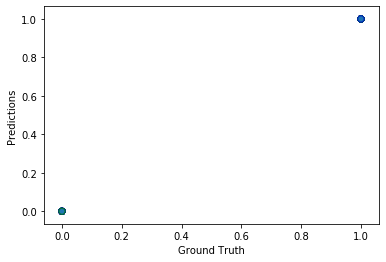

In [350]:
plt.scatter(yTrainPCA, predictions_modelKNC_Tuned_n, edgecolor=['blue','green'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();